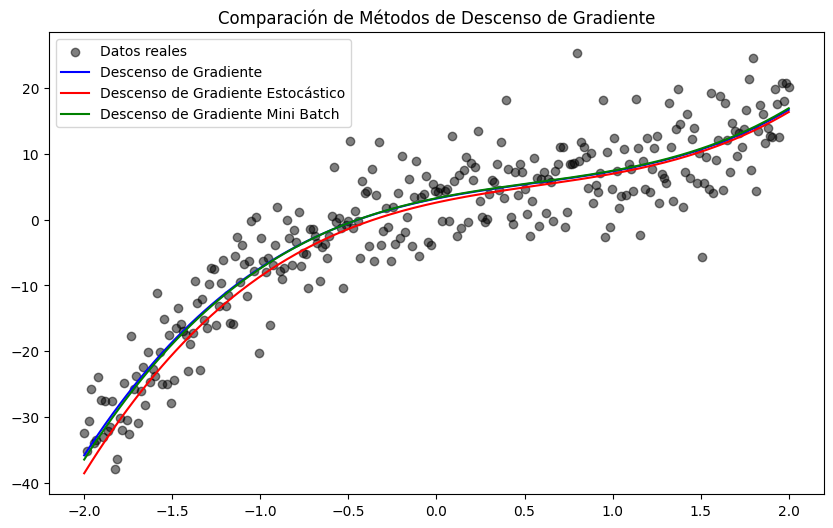

Tiempo GD: 0.4599s, Fitness GD: 23.9841
Tiempo SGD: 0.2550s, Fitness SGD: 25.2824
Tiempo MBGD: 0.5563s, Fitness MBGD: 24.0243
Método más rápido: SGD
Método con mejor fitness: GD


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Definimos el polinomio y su derivada
coeficientes = [2, -3, 5, 3]  # 2x^3 - 3x^2 + 5x + 3
polinomio = np.poly1d(coeficientes)

# Generamos datos reales
np.random.seed(42)
x_real = np.linspace(-2, 2, 300)
y_real = polinomio(x_real) + np.random.normal(0, 5, size=x_real.shape)  # Más ruido

# Función para calcular el gradiente del polinomio
def calcular_gradiente(w, x, y):
    y_pred = np.polyval(w, x)
    error = y_pred - y
    grad = np.zeros_like(w)
    for i in range(len(w)):
        grad[i] = np.mean(error * x ** (len(w) - i - 1))
    return grad

# Descenso de Gradiente (GD)
def gradient_descent(x, y, lr=0.01, epochs=5000):
    w = np.random.randn(4)  # Coeficientes iniciales aleatorios
    m = len(x)
    for _ in range(epochs):
        grad = calcular_gradiente(w, x, y)
        w -= lr * grad
    return w

# Descenso de Gradiente Estocástico (SGD)
def stochastic_gradient_descent(x, y, lr=0.01, epochs=5000):
    w = np.random.randn(4)
    m = len(x)
    for _ in range(epochs):
        i = np.random.randint(0, m)
        grad = calcular_gradiente(w, x[i:i+1], y[i:i+1])
        w -= lr * grad
    return w

# Descenso de Gradiente por Mini-Batches (MBGD)
def mini_batch_gradient_descent(x, y, lr=0.01, epochs=5000, batch_size=10):
    w = np.random.randn(4)
    m = len(x)
    for _ in range(epochs):
        indices = np.random.choice(m, batch_size, replace=False)
        x_batch = x[indices]
        y_batch = y[indices]
        grad = calcular_gradiente(w, x_batch, y_batch)
        w -= lr * grad
    return w

# Función para evaluar el error cuadrático medio (MSE)
def evaluate_fitness(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

start = time.time()
w_sgd = stochastic_gradient_descent(x_real, y_real)
time_sgd = time.time() - start

time.sleep(1)

# Aplicamos los métodos y medimos tiempos
start = time.time()
w_gd = gradient_descent(x_real, y_real)
time_gd = time.time() - start

time.sleep(1)  # Para separar los tiempos



start = time.time()
w_mbgd = mini_batch_gradient_descent(x_real, y_real)
time_mbgd = time.time() - start

# Evaluamos fitness
y_gd = np.polyval(w_gd, x_real)
y_sgd = np.polyval(w_sgd, x_real)
y_mbgd = np.polyval(w_mbgd, x_real)

fitness_gd = evaluate_fitness(y_real, y_gd)
fitness_sgd = evaluate_fitness(y_real, y_sgd)
fitness_mbgd = evaluate_fitness(y_real, y_mbgd)

# Graficamos
plt.figure(figsize=(10, 6))
plt.scatter(x_real, y_real, label='Datos reales', color='black', alpha=0.5)
plt.plot(x_real, y_gd, label='Descenso de Gradiente', color='blue')
plt.plot(x_real, y_sgd, label='Descenso de Gradiente Estocástico', color='red')
plt.plot(x_real, y_mbgd, label='Descenso de Gradiente Mini Batch', color='green')
plt.legend()
plt.title('Comparación de Métodos de Descenso de Gradiente')
plt.show()

# Comparación de tiempos y fitness
print(f"Tiempo GD: {time_gd:.4f}s, Fitness GD: {fitness_gd:.4f}")
print(f"Tiempo SGD: {time_sgd:.4f}s, Fitness SGD: {fitness_sgd:.4f}")
print(f"Tiempo MBGD: {time_mbgd:.4f}s, Fitness MBGD: {fitness_mbgd:.4f}")

# Análisis de resultados
faster_method = min([(time_gd, 'GD'), (time_sgd, 'SGD'), (time_mbgd, 'MBGD')])[1]
best_fitness_method = min([(fitness_gd, 'GD'), (fitness_sgd, 'SGD'), (fitness_mbgd, 'MBGD')])[1]
print(f"Método más rápido: {faster_method}")
print(f"Método con mejor fitness: {best_fitness_method}")